In [1]:
from nw.parser import NwParser
from sqlalchemy import create_engine
import pandas as pd
from nw.settings import NW_SQL_PATH, ELASTIC_HOSTS, ELK_HOST
# import pyelasticsearch
from nw.loggers import logger
from concurrent.futures import ProcessPoolExecutor
import joblib


def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]



# es = pyelasticsearch.ElasticSearch('http://' + ELK_HOST)
# engine = create_engine('sqlite:///{}'.format(NW_SQL_PATH))
# df = pd.read_sql('select topic_html, topic_url from nwdump limit 100', engine)
# parser = NwParser()

     

     
# failed = [] 
# p_json = []
# t_json = []
# for i, (topic_url, topic_html) in enumerate(zip(df.topic_url, df.topic_html)):
#     if i%1000 == 0:
#         print('processed {}'.format(i))
#     try:
#         posts_json, topic_json = parser.topic_html_to_json(topic_html)
#         p_json.append(posts_json)
#         t_json.append(topic_json)
        
#     except:
#         failed.append(topic_url)

In [16]:
%prun  parser.topic_html_to_json(df.topic_html.iloc[0])

In [9]:
( 170000 * 0.1 ) / 3600

4.722222222222222

processed 0
processed 1000
processed 2000
processed 3000
processed 4000
processed 5000
processed 6000
processed 7000
processed 8000
processed 9000
processed 10000
processed 11000
processed 12000
processed 13000
processed 14000
processed 15000
processed 16000
processed 17000
processed 18000
processed 19000
processed 20000
processed 21000
processed 22000
processed 23000
processed 24000
processed 25000
processed 26000
processed 27000
processed 28000
processed 29000
processed 30000
processed 31000
processed 32000
processed 33000
processed 34000
processed 35000
processed 36000
processed 37000
processed 38000
processed 39000
processed 40000
processed 41000
processed 42000
processed 43000
processed 44000
processed 45000
processed 46000
processed 47000
processed 48000
processed 49000
processed 50000
processed 51000
processed 52000
processed 53000
processed 54000
processed 55000
processed 56000
processed 57000
processed 58000
processed 59000
processed 60000
processed 61000
processed 62000
proce

In [91]:
joblib.dump('failed.pickl')

TypeError: dump() missing 1 required positional argument: 'filename'

In [92]:
import joblib

In [93]:
joblib.dump(failed, 'failed.pckl')

['failed.pckl']

In [94]:
joblib.dump(p_json,'p_json.pckl')

['p_json.pckl']

In [96]:
joblib.dump(t_json,'t_json.pckl')

['t_json.pckl']

In [3]:
# tops = joblib.load('t_json.pckl')
# posts = joblib.load('p_json.pckl')
failed = joblib.load('failed.pckl')

In [4]:
(item for sublist in l for item in sublist)

['http://netwars.pl/temat/173392',
 'http://netwars.pl/temat/173391',
 'http://netwars.pl/temat/173390',
 'http://netwars.pl/temat/172775',
 'http://netwars.pl/temat/172460',
 'http://netwars.pl/temat/172448',
 'http://netwars.pl/temat/172427',
 'http://netwars.pl/temat/172422',
 'http://netwars.pl/temat/172065',
 'http://netwars.pl/temat/171817',
 'http://netwars.pl/temat/171815',
 'http://netwars.pl/temat/171814',
 'http://netwars.pl/temat/171759',
 'http://netwars.pl/temat/171758',
 'http://netwars.pl/temat/171688',
 'http://netwars.pl/temat/171687',
 'http://netwars.pl/temat/171617',
 'http://netwars.pl/temat/171317',
 'http://netwars.pl/temat/169971',
 'http://netwars.pl/temat/169944',
 'http://netwars.pl/temat/169614',
 'http://netwars.pl/temat/169609',
 'http://netwars.pl/temat/169547',
 'http://netwars.pl/temat/169381',
 'http://netwars.pl/temat/169350',
 'http://netwars.pl/temat/169244',
 'http://netwars.pl/temat/169200',
 'http://netwars.pl/temat/169180',
 'http://netwars.pl/

In [21]:
del post_df

In [22]:
posts_df = pd.DataFrame.from_records(itertools.chain(*posts))

In [26]:
posts_df.to_hdf('posts_all.h5','posts')

/home/i008/anaconda2/envs/py35/lib/python3.5/site-packages/pandas/core/generic.py:1101: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['cites', 'forum_id', 'post_body', 'post_id', 'unique_post_id', 'user_href', 'user_name']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [32]:
for row in posts_df.iterrows():
    a = row
    break

In [36]:
a = a[1]

In [5]:
# import pandas as pd
# df = pd.read_hdf('posts_all.h5','posts')

h = df.head()
h.to_m

In [40]:
from nw.parser import NwParser
from sqlalchemy import create_engine
import pandas as pd
from nw.settings import NW_SQL_PATH, ELASTIC_HOSTS, ELK_HOST
import pyelasticsearch
from nw.loggers import logger


def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]


        

es = pyelasticsearch.ElasticSearch('http://' + ELK_HOST)
engine = create_engine('sqlite:///{}'.format(NW_SQL_PATH))
df = pd.read_sql('select  topic_html from nwdump limit 100', engine)


# docs = [es.index_op(d, id=d.get('unique_post_id')) for d in collect]
# for i, chun in enumerate(chunks(docs, int(len(docs) * .05))):
#     logger.info('processing chunk {}'.format(i))
#     res = es.bulk(chun, index='nw', doc_type='post')
#     print(res)
#     print('---' * 10)
#     print(failed)

In [13]:
df['post_length'] = df.post_body.apply(lambda x: len(x))

In [28]:
df[df.user_name.isin(df.user_name.value_counts()[:2000].index)].groupby(df.user_name)['post_length'].mean().sort_values(ascending=False)

user_name
Gleborzut          765.387640
Carlsberg          693.891657
USS.Terminator     630.175960
klops              537.326572
TDB)Torvus         512.793552
Skeleton           484.625597
Dural              475.274005
Neddy              466.762691
WALDEK_MSCICIEL    446.877004
krufki             439.557604
Merlin[7th]        437.975212
=MCh=KaneOL        436.157471
DarK_sItHIOus      423.104430
[xf]katar          422.902864
UnNamedPlayer      422.418954
TheOne.zn          422.016787
SeXyWombaT         419.445725
=SF=Jurgen         417.341546
lamenq             408.561600
Mateo              406.690980
drab               402.222985
Pieluch78          401.002114
pwl[SSF]           400.994729
TheNightmar        400.799011
Rion               398.911748
coolkeg            394.161036
Dig                381.770221
[rd]triceratops    376.661905
ApyT               372.470297
Majak              369.381065
                      ...    
DL)WoRmS            50.983170
Intel^Skun          50.736220


In [30]:
len(df.post_body.loc[10])

119

In [8]:
df.shape

(5496160, 9)

In [9]:
import joblib

In [10]:
topics_=joblib.load('t_json.pckl')

In [12]:
df_topics = pd.DataFrame.from_records(topics_)

In [13]:
df_topics.to_hdf('topics_all.h5','topics')

In [3]:
from nw.jobs import index_topics

In [4]:
index_topics([173498])

2016-12-01 19:43:07,192 - nw-logger - INFO - RUNNING RE-INDEX-SCRAPE JOB for topics: [173498]
2016-12-01 19:43:07,195 - nw-logger - INFO - Indexing topic 173498
2016-12-01 19:43:07,198 - nw-logger - DEBUG - parsing topic number 173498
2016-12-01 19:43:08,048 - nw-logger - INFO - {'forum_id': '/forum/4', 'topic_name': '#PizzaGate', 'topic_id': 173498, 'post_date': datetime.datetime(2016, 11, 20, 22, 39, 19)}
2016-12-01 19:43:08,049 - nw-logger - INFO - ['{"index": {"_id": 173498}}\n{"forum_id": "/forum/4", "topic_name": "#PizzaGate", "topic_id": 173498, "post_date": "2016-11-20T22:39:19"}']


1

In [6]:
from pyelasticsearch import ElasticSearch

In [7]:
es = ElasticSearch()

In [ ]:
es.search(
{
    "sort" : 
        { "topic_id" : {"order" : "asc"}},

}

)

In [6]:
import pandas as pd

In [7]:
posts = pd.read_hdf('/media/i008/duzy1/posts_all.h5')
topic = pd.read_hdf('/media/i008/duzy1/topics_all.h5')

In [12]:
topic.shape

(144639, 4)

In [8]:
M = posts.merge(topic[['topic_id','topic_name']], on='topic_id')

,cites,forum_id,post_body,post_date,post_id,topic_id,unique_post_id,user_href,user_name,topic_name
0,[],/forum/4,Dzisiaj rano wsiadając do auta spotkała mnie n...,2016-11-16 13:46:15,1,173469,173469.1,29243,Vol,[ZNPZ] Auto porysowane gowździem
1,[],/forum/4,Jak nie ma kamer i nikt nic nie widział to rac...,2016-11-16 13:50:19,2,173469,173469.2,7201,Rocca,[ZNPZ] Auto porysowane gowździem
2,[],/forum/4,Dzwon pod 666 podoficer Zupa,2016-11-16 13:51:45,3,173469,173469.3,18416,KiV,[ZNPZ] Auto porysowane gowździem
3,[post_2],/forum/4,"i właśnie tak kombinuję, tym bardziej że kole...",2016-11-16 13:52:45,4,173469,173469.4,29243,Vol,[ZNPZ] Auto porysowane gowździem
4,[],/forum/4,"<fragment z pulp fiction jak Vince sie zali, z...",2016-11-16 13:54:20,5,173469,173469.5,15662,maac,[ZNPZ] Auto porysowane gowździem
5,[],/forum/4,"Popieram Janusza, albo mu płać za odśnieżanie,...",2016-11-16 14:04:10,6,173469,173469.6,28070,AlienStalker,[ZNPZ] Auto porysowane gowździem
6,[],/forum/4,#6 bo każdy bez garażu to biedak. Logika tak m...,2016-11-16 14:08:00,7,173469,173469.7,28597,klimuszko,[ZNPZ] Auto porysowane gowździem
7,[],/forum/4,Strata czasu iść na policję jak nie ma świadkó...,2016-11-16 14:08:43,8,173469,173469.8,5923,[IMP]Zupa,[ZNPZ] Auto porysowane gowździem
8,[],/forum/4,Skurwysyństwa nie brakuje.,2016-11-16 14:12:30,9,173469,173469.9,29465,CaliSto,[ZNPZ] Auto porysowane gowździem
9,"[post_6, post_8]",/forum/4,"mamy 1 garaż i 2 auta, tacy biedni jesteśmy :...",2016-11-16 14:14:32,10,173469,173469.10,29243,Vol,[ZNPZ] Auto porysowane gowździem


In [21]:
from concurrent.futures import ProcessPoolExecutor
import sqlite3
from nw.loggers import logger
from nw.parser import NwParser
import datetime
import joblib
import pandas as pd
from pandas.io import sql
import json


parser = NwParser()
conn =sqlite3.connect('/media/i008/duzy1/nwdb.sqlite')

def t_to_json(html):
    try:
        return parser.topic_html_to_json(html)
    except:
#         logger.info('--failed--')
        pass

select = conn.execute('select topic_html from nwdump')
collect = []
ii = 0
for row in select:
    if not ii%1000: 
        logger.info('{} -- {}'.format(datetime.datetime.utcnow(), ii))       
    collect.append(t_to_json(row[0]))
    ii+=1

    
joblib.dump(collect, 'all_posts_list.pickl')


df = pd.DataFrame.from_records(flattened)
df.to_hdf('allposts_new','posts')


dx = df[:]
dx.cites = dx.cites.apply(lambda x: json.dumps(x))
dx.post_date = dx.post_date.astype(str)
cnx = sqlite3.connect('nw_posts.sqlite')
sql.to_sql(dx,'nw_posts', cnx, if_exists='replace', chunksize=50000)

2016-12-02 01:01:46,211 - nw-logger - INFO - 2016-12-02 00:01:46.211263 -- 0
2016-12-02 01:03:23,439 - nw-logger - INFO - 2016-12-02 00:03:23.439485 -- 1000
2016-12-02 01:05:01,554 - nw-logger - INFO - 2016-12-02 00:05:01.554548 -- 2000
2016-12-02 01:06:44,060 - nw-logger - INFO - 2016-12-02 00:06:44.060275 -- 3000
2016-12-02 01:08:15,276 - nw-logger - INFO - 2016-12-02 00:08:15.276098 -- 4000
2016-12-02 01:09:42,407 - nw-logger - INFO - 2016-12-02 00:09:42.407831 -- 5000
2016-12-02 01:11:07,606 - nw-logger - INFO - 2016-12-02 00:11:07.606793 -- 6000
2016-12-02 01:12:33,374 - nw-logger - INFO - 2016-12-02 00:12:33.374701 -- 7000
2016-12-02 01:13:47,444 - nw-logger - INFO - 2016-12-02 00:13:47.444484 -- 8000
2016-12-02 01:15:06,689 - nw-logger - INFO - 2016-12-02 00:15:06.689189 -- 9000
2016-12-02 01:16:15,422 - nw-logger - INFO - 2016-12-02 00:16:15.422615 -- 10000
2016-12-02 01:17:22,723 - nw-logger - INFO - 2016-12-02 00:17:22.723138 -- 11000
2016-12-02 01:18:23,791 - nw-logger - INF

In [25]:
# flattened = [item for sublist in filter(None,collect) for item in sublist]
joblib.dump(flattened, 'flattened_posts.pickl')


['flattened_posts.pickl']

In [39]:
d = pd.read_sql('select * from nw_posts', cnx)

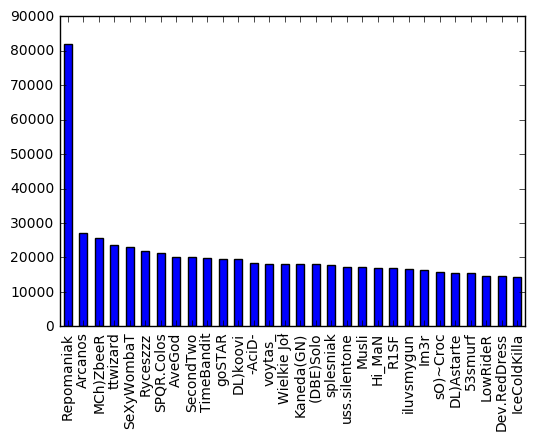

In [46]:
%matplotlib inline
d.user_name.value_counts()[:30].plot(kind='bar')

In [1]:
import pandas as pd

In [2]:
df = pd.read_hdf('/media/i008/duzy1/nw_data/nw_posts.hdf5', 'posts')

In [3]:
df.head().to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>cites</th>\n      <th>forum_id</th>\n      <th>post_body</th>\n      <th>post_date</th>\n      <th>post_id</th>\n      <th>topic_id</th>\n      <th>topic_name</th>\n      <th>unique_post_id</th>\n      <th>user_id</th>\n      <th>user_name</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>[]</td>\n      <td>/forum/4</td>\n      <td>Dzisiaj rano wsiadając do auta spotkała mnie n...</td>\n      <td>2016-11-16 13:46:15</td>\n      <td>1</td>\n      <td>173469</td>\n      <td>[ZNPZ] Auto porysowane gowździem</td>\n      <td>173469-1</td>\n      <td>29243</td>\n      <td>Vol</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>[]</td>\n      <td>/forum/4</td>\n      <td>Jak nie ma kamer i nikt nic nie widział to rac...</td>\n      <td>2016-11-16 13:50:19</td>\n      <td>2</td>\n      <td>173469</td>\n      <td>[ZNPZ] Auto porysowane gowździem</td>\n